<img src="https://elearning.unidata.ucar.edu/dataeLearning/Cybertraining/analysis/media/NSF-Unidata_lockup_vertical_2023.png" width="150px" align="right">

# Machine Learning Analysis in the Earth Systems Sciences

In this module, you are tasked with planning, implementing, and evaluating a machine learning solution for a real-world scenario. Given pre-configured code blocks and prepared data, you will create a problem statement, explore the data, experiment with model development, and ultimately make a recommendation on the utility of machine learning for your scenario.

# Damaged weather station in western North Carolina

Play the video below to learn about the situation at hand.

<video width="600" controls>
  <source src="https://elearning.unidata.ucar.edu/dataeLearning/Cybertraining/analysis/media/stationsintrovideo_i1_nojupyterdemo.mp4" type="video/mp4">
</video>

<a href="https://www.google.com/url?q=https://docs.google.com/document/d/e/2PACX-1vRfYtUFjLVfNadQ0nvUv4E8MzfaXmQwt_WcP0haCo5bH1J0zGZiupiJz7XuLsun2BqN-g_ubbACpx6p/pub&sa=D&source=docs&ust=1738596555923034&usg=AOvVaw2xJ1FEg1SflwC6i3P5uQqD" target="blank">Transcript</a>

Now you will begin the process of following the supervised machine learning model framework to address this task. Starting with problem framing.
<center><a href="https://elearning.unidata.ucar.edu/dataeLearning/Cybertraining/analysis/media/RevisedFull_NOPROCESS_.png" target="blank"><img src="https://elearning.unidata.ucar.edu/dataeLearning/Cybertraining/analysis/media/RevisedFull_NOPROCESS_.png"></a><br><i>Click to enlarge</i></center>

## Part 1: Problem Framing

Based on the information provided in the video, which *type* of machine learning analysis is most appropriate for this scenario? Select the corresponding button to check your selection.

In [1]:
# These are the tools that python is calling, similar to a matlab toolbox
import ipywidgets as widgets
import matplotlib.pyplot as plt
from IPython.display import display, clear_output, HTML, IFrame

from button_tech import display_quiz

In [2]:
display_quiz()

Output()

As a part of the problem framing step, we must answer a series of questions to ensure we're creating the best solution for this scenario. 

***Does a simpler solution exist?***
> From the video, we know that you have already completed a preliminary analysis that averaged values from nearby stations to Mt Mitchell. While these results showed some skill, there is room for improvement. 

***Can machine learning requirements be met?***
> The NC ECONet data provider has decades of hourly data available from several weather stations. This is sufficient for your model. 

***Which scientific question should be answered?***
> You will answer this question in **Exercise 1** below. 

<div class="alert alert-success" role="alert">
<p class="admonition-title" style="font-weight:bold">Exercise 1</p>
    <p>In your <b>Machine Learning Model Handbook</b>, type the scientific question to be answered for this situation.</p>
    <p>GENERAL RUBRIC TBD</p>
</div>

## Part 2: Data Handling

### Part 2a: Locate Data of Interest

You will be using other stations in the <a href="https://econet.climate.ncsu.edu/" target="blank">NC ECONet</a> for this project. Your colleague is a <a href="https://www.mongodb.com/resources/basics/data-engineering#what-is-data-engineering" target="blank">data engineer</a> who has done much of the data preparation for you. They have prepared the following document to describe the nature of the dataset they are providing you for your model building work. 

<div class="alert alert-info" role="alert">

### Metadata Document for Western North Carolina Weather Station Data

#### General Information

Dataset Name: Western NC Weather Station Time-Series Data

Description: This dataset contains tabular time-series data collected from multiple weather stations in Western North Carolina. The data includes atmospheric and environmental variables recorded at hourly intervals.

Date Range: January 1, 2015, to December 16, 2024

Geographic Coverage: Western North Carolina 

Data Frequency: Hourly

Last Updated: Jan 1, 2025

#### Data Structure

File Format: .parquet

Number of Records: 69,760 per station per feature

Columns (Features) 

- observation_datetime: Date and time of observation in UTC

Columns (features) per Station (XXXX):

- XXXX_airtemp_degF (°F): Air temperature measured at 2 meters above ground level
- XXXX_windspeed_mph (mph): Average wind speed during the hour at 10 meters above ground level
- XXXX_winddgust_mph (mph): Peak wind gust during the hour at 10 meters above ground level
- XXXX_rh_percent (%): Average Relative humidity
- XXXX_precip_in (in): Total precipitation accumulated in the hour

Stations:

- BEAR (Bearwallow Mountain)
- BURN (Burnsville Tower)
- FRYI (Frying Pan Mountain)
- JEFF (Mount Jefferson Tower)
- **MITC (Mount Mitchell State Park) - target station**
- NCAT (North Carolina A&T University Research Farm)
- SALI (Piedmont Research Station)
- SASS (Sassafrass Mountain)
- UNCA (University of North Carolina - Asheville Weather Tower)
- WINE (Wayah Bald Mountain)

<a href="https://econet.climate.ncsu.edu/" target="blank">More station info</a>

#### Data Quality

Missing Data: Missing data besides MITC was filled in using seasonal values and basic interpolation.

Outlier Handling: No outlier handling was done. 

#### Data Provenance

Source: North Carolina State Climate Office ECONet, <a href="https://econet.climate.ncsu.edu" target="blank">https://econet.climate.ncsu.edu/about/</a>

</div>

### Part 2b: Explore Data

While your data engineer colleague prepared the data for your model and created the metadata document, you will still need to familiarize yourself with the data before you use it as input to a machine learning algorithm. In this step, you will take a closer look at the potential features for your model with a few plots. 

First, let's read the data into this workspace. The data resides on a remote THREDDS Data Server, which allows users to access data without manually downloading files to your computer. When you execute the code cell below, you will load the Python library `pandas` that includes all the tools for reading the data from the THREDDS Data Server and opening it in this workspace. 

*Executing the cell below may take a moment to complete.*

In [3]:
# Import the pandas Python library that can interpret the data file
import pandas as pd

# Location of the data on the remote server
file_path = 'https://thredds.ucar.edu/thredds/fileServer/cybertraining/CyberTraining_NC_ECOnet_data.parquet'

# Read data into this workspace
df = pd.read_parquet(file_path) 

The ***target features*** (the features that we are trying to predict with the machine learning model) are temperature, relative humidity, wind speed, wind gust, and precipitation at the Mt. Mitchell station. All other station data are possible ***input features*** to the model. 

#### Explore target features

Let's now explore just the target features at Mt. Mitchell. In the code cell below, you will import the necessary Python libraries and functions that power the plotting widget. The widget will load after executing the cell. 

In the plotting widget, select the environmental variable and plot type from the dropdowns, then select Plot to reveal the plot. 

In [4]:
from button_tech import display_mt_mitchell_weather_dashboard

In [5]:
display_mt_mitchell_weather_dashboard(df)

HTML(value='<h3>Mt. Mitchell</h3>')

Dropdown(description='Variable:', options=(('Temperature (F)', 'MITC_airtemp_degF'), ('Average Wind Speed (mph…

Dropdown(description='Plot type:', options=('Histogram', 'Time Series'), value='Histogram')

Button(description='Plot', style=ButtonStyle())

Output()

#### Explore input features

Now explore the ***input features***. Below is a map of where the stations are located in relation to MITC. Click on the image below to open an interactive map.

<center><a href="https://elearning.unidata.ucar.edu/dataeLearning/Cybertraining/analysis/media/plotlystationmap.html" target="blank"><img src="https://elearning.unidata.ucar.edu/dataeLearning/Cybertraining/analysis/media/stationmap_plotly.png"></a><br>
<i>Click to open interactive map</i></center>

After executing the cell below, select a station, variable, and type of plot, then select Plot to reveal the plot. 

To copy an image for pasting into your handbook, hold shift and right click on the image, then select Copy.

In [6]:
from button_tech import display_input_stations_dashboard

In [7]:
display_input_stations_dashboard(df)

HTML(value='<h3>Input Stations</h3>')

Dropdown(description='Station:', options=('BEAR', 'BURN', 'FRYI', 'JEFF', 'NCAT', 'SALI', 'SASS', 'UNCA', 'WIN…

Dropdown(description='Variable:', options=(('Temperature (F)', 'airtemp_degF'), ('Average Wind Speed (mph)', '…

Dropdown(description='Plot type:', options=('Histogram', 'Time Series'), value='Histogram')

Button(description='Plot', style=ButtonStyle())

Output()

#### Compare stations
We can also plot direct comparisons of stations in our dataset by plotting data at each station in a grid of plots. In these comparison grids, the scatter plots display the observations at each station, for example, the temperature at MITC on the x-axis and the temperature at SASS on the y-axis. Stations that are well-correlated will show points that are generally clustered with very little spread. 

<center><a href="https://elearning.unidata.ucar.edu/dataeLearning/Cybertraining/analysis/media/wellcorrelated.png" target="blank"><img src="https://elearning.unidata.ucar.edu/dataeLearning/Cybertraining/analysis/media/wellcorrelated.png" width="200 px"></a> <a href="https://elearning.unidata.ucar.edu/dataeLearning/Cybertraining/analysis/media/notwellcorrelated.png" target="blank"><img src="https://elearning.unidata.ucar.edu/dataeLearning/Cybertraining/analysis/media/notwellcorrelated.png" width="200 px"></a><br><i>Click to enlarge</i></center>

The grid displays histograms where the x- and y-axes are the same station. These are the same histograms that you plotted previously, displaying the distribution of all values at that station. 

As previous, you will execute the cell below to initialize the widget, then use the dropdown to select a variable and select Plot. To copy an image for pasting into your handbook, hold shift and right click on the image, then select Copy.

In [8]:
from button_tech import display_correlation_plot_dashboard

In [9]:
display_correlation_plot_dashboard()

Dropdown(description='Variable:', options=(('Temperature (F)', 'airtemp_degF'), ('Precipitation (in)', 'precip…

Button(description='Plot', style=ButtonStyle())

Output()

<div class="alert alert-success" role="alert">
<p class="admonition-title" style="font-weight:bold">Exercise 2b</p>
    <p>In your <b>Machine Learning Model Handbook</b>, describe your exploratory data analysis of any target and input features of note. Include the following:
    <ul>
        <li>Do variables follow diurnal or annual patterns generally as expected?</li>
        <li>Do the variables have the expected ranges of values? Do any variables appear to include major outliers?</li>
        <li>Which stations appear to be most correlated to the variables at Mt Mitchell? Why?</li>
        <li>Which variables do you think will be easiest to prdict with a machine learning model? Why?</li>
        <li>Include any <i>important</i> plots to illustrate your conclusions. Limit yourself to 5 plots. <br><i>To copy a plot image, hold shift, right click on the image, then select Copy.</i></li>
    </ul>
    </p>
    <p>GENERAL RUBRIC TBD</p>
</div>

### Part 2c: Create a data splitting strategy

Next we create a data splitting strategy. Data splitting refers to the process of dividing data into three groups: training, validation, and testing. Each of these groups represent a part of the iterative process for machine learning model development. 

- Training data is the largest subset, usually around 60-80% of the total data, and is used to initially train the model. 
- Validation data is roughly 10-20% of the total data, and is used to validate the effectiveness of the training process. 
- Testing data is also roughly 10-20% of the total data, and is used to test the final refined model before using it on new, unseen data.

Each group should be separate to ensure no single group will bias the model. In this model, the data will be randomly split into these groups, but you decide the proportions of data for each group. Input your percentages in the blanks below, ensuring all percentages equal 100%.

In [10]:
from button_tech import create_percentage_widget

In [11]:
widget, get_values = create_percentage_widget()

In [16]:
# HIDE THIS
decimals = get_values()
training = decimals['training']
validation = decimals['validation']
testing = decimals['testing']

In [17]:
# HIDE THIS
def split_data_temporal(df, final_cutoff='2024-09-28', train_pct=0.6, val_pct=0.2, test_pct=0.2):
    """
    Split data into training, validation, and testing sets based on chronological order.
    The splits are created in this order: Training (earliest dates), Validation (middle dates),
    Testing (latest dates before cutoff), and True Test (after cutoff)
    
    Parameters:
    -----------
    df : pandas DataFrame
        Input DataFrame with a 'date' column
    final_cutoff : str
        Date string for the cutoff between validation and true test sets
    train_pct : float
        Percentage of pre-cutoff data to use for training (default: 0.6)
    val_pct : float
        Percentage of pre-cutoff data to use for validation (default: 0.2)
    test_pct : float
        Percentage of pre-cutoff data to use for testing (default: 0.2)
    """
    # Input validation
    if not abs(train_pct + val_pct + test_pct - 1.0) < 1e-10:
        raise ValueError("Training, validation, and testing percentages must sum to 1.0")
    
    # Convert dates to pandas datetime
    final_cutoff = pd.to_datetime(final_cutoff)
    
    # Create mask for true test set
    true_test_mask = df['date'] > final_cutoff
    
    # Get the remaining data (everything up to final_cutoff)
    remaining_data = df[~true_test_mask].copy()
    remaining_data = remaining_data.sort_values('date')
    
    # Calculate the split points based on percentages
    n_samples = len(remaining_data)
    train_end_idx = int(n_samples * train_pct)
    val_end_idx = int(n_samples * (train_pct + val_pct))  # Changed from test_end_idx
    
    # Get the dates at these split points
    train_cutoff = remaining_data.iloc[train_end_idx]['date']
    val_cutoff = remaining_data.iloc[val_end_idx]['date']  # Changed from test_cutoff
    
    # Create masks for each period in chronological order
    train_mask = df['date'] <= train_cutoff
    val_mask = (df['date'] > train_cutoff) & (df['date'] <= val_cutoff)  # Middle period
    test_mask = (df['date'] > val_cutoff) & (df['date'] <= final_cutoff)  # Latest period before final cutoff
    
    # Split the data
    # Exclude observation_datetime, year_index, and date from features
    X_cols = [col for col in df.columns 
              if 'MITC' not in col 
              and col not in ['observation_datetime', 'year_index', 'date']]
    y_cols = [col for col in df.columns if 'MITC' in col]
    
    # Create the splits in chronological order
    X_train = df.loc[train_mask, X_cols]
    y_train = df.loc[train_mask, y_cols]
    
    X_val = df.loc[val_mask, X_cols]
    y_val = df.loc[val_mask, y_cols]
    
    X_test = df.loc[test_mask, X_cols]
    y_test = df.loc[test_mask, y_cols]
    
    X_true_test = df.loc[true_test_mask, X_cols]
    y_true_test = df.loc[true_test_mask, y_cols]
    
    # Print summary statistics in chronological order
    print("Data split summary:")
    print(f"Training period: {df.loc[train_mask, 'date'].min()} to {df.loc[train_mask, 'date'].max()}")
    print(f"Training samples: {len(X_train)} ({len(X_train)/len(remaining_data):.1%} of pre-cutoff data)")
    
    print(f"\nValidation period: {df.loc[val_mask, 'date'].min()} to {df.loc[val_mask, 'date'].max()}")
    print(f"Validation samples: {len(X_val)} ({len(X_val)/len(remaining_data):.1%} of pre-cutoff data)")
    
    print(f"\nTesting period: {df.loc[test_mask, 'date'].min()} to {df.loc[test_mask, 'date'].max()}")
    print(f"Testing samples: {len(X_test)} ({len(X_test)/len(remaining_data):.1%} of pre-cutoff data)")
    
    print(f"\nTrue test period: {df.loc[true_test_mask, 'date'].min()} to {df.loc[true_test_mask, 'date'].max()}")
    print(f"True test samples: {len(X_true_test)}")
    
    return (X_train, y_train, X_val, y_val, X_test, y_test, X_true_test, y_true_test)

In [18]:
# Use the function
X_train, y_train, X_val, y_val, X_test, y_test, X_true_test, y_true_test = split_data_temporal(df,
                                                                                               train_pct=training,
                                                                                               val_pct=validation,
                                                                                               test_pct=testing)

Data split summary:
Training period: 2017-01-01 00:00:00 to 2020-02-05 22:00:00
Training samples: 27137 (40.0% of pre-cutoff data)

Validation period: 2020-02-05 23:00:00 to 2023-03-12 16:00:00
Validation samples: 27136 (40.0% of pre-cutoff data)

Testing period: 2023-03-12 17:00:00 to 2024-09-28 00:00:00
Testing samples: 13568 (20.0% of pre-cutoff data)

True test period: 2024-09-28 01:00:00 to 2024-12-16 23:00:00
True test samples: 1919


## Part 3: Model Development
Next begins the iterative process of creating, evaluating, and refining your machine learning model. You will start with an initial model, and keep track of your subsequent trials in your Machine Learning Model Handbook. 
<center><a href="https://elearning.unidata.ucar.edu/dataeLearning/Cybertraining/analysis/media/RevisedFull_NOPROCESS_.png" target="blank"><img src="https://elearning.unidata.ucar.edu/dataeLearning/Cybertraining/analysis/media/RevisedFull_NOPROCESS_.png"></a><br><i>Click to enlarge</i></center>

### Part 3a: Choose Algorithm
First, you will choose an algorithm to train. You have two options: the *XGBR Regressor* and the *MultiLinearRegressor*. Both have pros and cons for this task. Choose one for your initial model, but you may choose to test the other algorithm in subsequent trials. 

<div class="alert alert-info" role="alert">
    <p class="admonition-title" style="font-weight:bold">About the Algorithms</p>
    <p class="admonition-title" style="font-weight:bold">XGBR Regressor</p>
    - Can make predictions on a variety of data distributions<br>
    - Can overfit the data<br><br>
    <p class="admonition-title" style="font-weight:bold">MultiLinearRegressor</p>
    - Standard baseline linear model<br>
    - Struggles to make predictions on non-uniformly distributed data
</div>

In [19]:
from button_tech import algorithm_selection

In [20]:
selected_algo = algorithm_selection()

Output()

In [21]:
# HIDE THIS
from xgboost import XGBRegressor
import time 
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor

In [22]:
# HIDE THIS
class MultiXGBRegressor(MultiOutputRegressor):
    def __init__(self, estimator):
        super().__init__(estimator)
        self.estimators_ = []

    def fit(self, X, y):
        start_time = time.time()
        print("\nStarting Multi-Target XGBoost Training Process...")
        y_np = y.values if hasattr(y, 'values') else np.array(y)
        n_outputs = y_np.shape[1]
        target_names = y.columns if hasattr(y, 'columns') else [f"target_{i}" for i in range(n_outputs)]
        
        self.estimators_ = [
            XGBRegressor(**{k: v for k, v in self.estimator.get_params().items() 
                          if k != 'verbose'}) 
            for _ in range(n_outputs)
        ]
        
        for i, (est, target) in enumerate(zip(self.estimators_, target_names)):
            target_start = time.time()
            print(f"\nTraining target {i+1}/{n_outputs}: {target}", flush=True)
            est.fit(X, y_np[:, i], verbose=False)
            target_time = time.time() - target_start
            print(f"Target completed in {target_time:.2f} seconds", flush=True)

        total_time = time.time() - start_time
        print(f"\nTotal training completed in {total_time:.2f} seconds")
        return self


In [23]:
# HIDE THIS
class MultiLinearRegressor(MultiOutputRegressor):
    def __init__(self):
        super().__init__(LinearRegression())
        self.estimators_ = []

    def fit(self, X, y):
        start_time = time.time()
        print("\nStarting Multi-Target Linear Regression Training...")
        y_np = y.values if hasattr(y, 'values') else np.array(y)
        n_outputs = y_np.shape[1]
        target_names = y.columns if hasattr(y, 'columns') else [f"target_{i}" for i in range(n_outputs)]
        
        self.estimators_ = [LinearRegression() for _ in range(n_outputs)]
        
        for i, (est, target) in enumerate(zip(self.estimators_, target_names)):
            target_start = time.time()
            print(f"\nTraining target {i+1}/{n_outputs}: {target}", flush=True)
            est.fit(X, y_np[:, i])
            target_time = time.time() - target_start
            print(f"Target completed in {target_time:.2f} seconds", flush=True)

        total_time = time.time() - start_time
        print(f"\nTotal training completed in {total_time:.2f} seconds")
        return self

### Part 3b: Choose input features

Given your data exploration, you must now choose the stations to use as input features. You may choose as many input stations as you'd like, however, recall that more stations does not always create a better model. Think strategically based on your evidence. 

<center><a href="https://elearning.unidata.ucar.edu/dataeLearning/Cybertraining/analysis/media/plotlystationmap.html" target="blank"><img src="https://elearning.unidata.ucar.edu/dataeLearning/Cybertraining/analysis/media/stationmap_plotly.png"></a><br>
<i>Click to open interactive map</i></center>

In [24]:
from button_tech import create_station_selector

In [25]:
station_selector = create_station_selector()

In [26]:
# Can this be combined with the above? User gets feedback on 
# selected stations in the widget above, but will need for 
# the evaluation metrics in Validation and Testing

# To get selected stations at any time:
def get_selected_stations(selector):
    return [station for station, checkbox in selector.items() if checkbox.value]

selected = get_selected_stations(station_selector)
selected 

['FRYI', 'NCAT', 'SALI', 'WINE']

In [27]:
# HIDE THIS
def filter_dataframe(df, prefix_values):
    """
    Filter DataFrame to keep only columns with specified prefixes plus day_index and hour_index.
    
    Parameters:
    df (pandas.DataFrame): Input DataFrame
    prefix_values (list): List of prefix values to match
    
    Returns:
    pandas.DataFrame: Filtered DataFrame with only the specified columns
    """
    # Print original column count
    print(f"Original DataFrame: {len(df.columns)} columns")
    
    # Start with day_index and hour_index
    columns_to_keep = ['day_index', 'hour_index']
    
    # Add any column that starts with our prefix values
    for prefix in prefix_values:
        matching_columns = [col for col in df.columns if col.startswith(prefix)]
        columns_to_keep.extend(matching_columns)
    
    # Create filtered dataframe
    filtered_df = df[columns_to_keep]
    
    # Print new column count
    print(f"Filtered DataFrame: {len(filtered_df.columns)} columns")
    
    return filtered_df

In [28]:
# HIDE THIS - Or describe what's happening 
# (if keeping, need to eliminate or make the printout more understandable)
X_train_filtered = filter_dataframe(X_train, selected)
X_val_filtered = filter_dataframe(X_val, selected)
X_test_filtered = filter_dataframe(X_test, selected)
X_true_test_filtered = filter_dataframe(X_true_test, selected)

Original DataFrame: 47 columns
Filtered DataFrame: 22 columns
Original DataFrame: 47 columns
Filtered DataFrame: 22 columns
Original DataFrame: 47 columns
Filtered DataFrame: 22 columns
Original DataFrame: 47 columns
Filtered DataFrame: 22 columns


### Part 3c: Train the Algorithm

The training process is what transforms the machine learning algorithm you just selected into a supervised machine learning model. Executing the cell below starts the process of the agorithm learning patterns and relationships in the training data.

In [29]:
selected_model = None  # Global variable for model access

def train_model_button(selected_algo):  # selected_algo is now a parameter
    """Creates a single 'Train ML Model' button, using the provided selected_algo."""
    global selected_model
    output = widgets.Output()

    train_button = widgets.Button(description='Train Algorithm', layout=widgets.Layout(width='200px', height='200px'))

    def train_model(b):
        global selected_model
        with output:
            clear_output()
            if selected_algo == "xgboost":
                print("Running XGBoost model...")
                base_model = XGBRegressor(
                    n_estimators=100,
                    tree_method='hist',
                    random_state=42
                )
                selected_model = MultiXGBRegressor(base_model) # Assuming this is defined
                selected_model.fit(X_train_filtered, y_train) # Make sure these variables are available
                print("XGBoost model training completed!")
            elif selected_algo == "linear_regression":
                print("Running Linear Regression model...")
                selected_model = MultiLinearRegressor() # Assuming this is defined
                selected_model.fit(X_train_filtered, y_train) # Make sure these variables are available
                print("Linear Regression training completed!")
            else:
                print("No algorithm selected. Cannot train.")

    train_button.on_click(train_model)

    display(train_button)
    display(output)

    return selected_model  # Return the trained model (or None if not trained)

In [30]:
from button_tech import train_model_button

ImportError: cannot import name 'train_model_button' from 'button_tech' (/Users/tmartin/Documents/GitHub/cybertraining-pilot/button_tech.py)

In [31]:
model_choice = selected_algo()
train_model_button(model_choice)

Button(description='Train Algorithm', layout=Layout(height='200px', width='200px'), style=ButtonStyle())

Output()

### Part 3c: Validate the Model

The validation step uses validation data to evaluate how well the training process performed. By using a separate dataset to evaluate performance, we get a better sense of how well the model can generalize to new inputs.

The cell below does several steps:
1. Import the Python libraries that calculate statistics
2. Make predictions with the validation dataset
3. Generate validation metrics
4. Print the validation metrics

<div class="alert alert-info" role="alert">
    <p class="admonition-title" style="font-weight:bold">About the Evaluation Metrics</p>
    <p class="admonition-title" style="font-weight:bold">Root Mean Square Error (RMSE)</p>
    <ul>
        <li>A measure of how large a typical prediction error is</li>
        <li>Reports error in the original units (degrees, %, mph, etc)
            <ul>
                <li>e.g., an error of 5 mph means the prediction may be ± 5 mph from the actual value</li>
            </ul>
        </li>
        <li>Better reflects the accuracy of predictions in real-world situations</li>
        <li>Dependent on the scale of the dataset, making comparisons among datasets more difficult</li>
    </ul>
    <p class="admonition-title" style="font-weight:bold">R²</p>
    <ul>
        <li>A measure of how well the model explains the variation in the dataset</li>
        <li>A standardized scale (0-1) for comparing models across different trials</li>
        <li>The closer to 1, the better the model accuracy</li>
        <li>Assumes that the input data have a linear relationship</li>
        <li>Only measures correlation among input data, cannot distinguish good and bad predictions</li>
    </ul>
</div>

In [34]:
# import the Python libraries that calculate 
# the evaluation metrics
import numpy as np
from sklearn.metrics import root_mean_squared_error, r2_score

# Make predictions (validation)
y_pred = selected_model.predict(X_test_filtered)

# Evaluate the model (generate validation metrics)
rmse = root_mean_squared_error(y_test, y_pred, multioutput='raw_values')
r2 = r2_score(y_test, y_pred, multioutput='raw_values')

print("Validation Metrics")
print("\nSelected Algorithm:")
print(model_choice)
print("\nSelected Stations:")
print(get_selected_stations(station_selector))
print("\nRMSE for each target feature:")
for target, error in zip(y_test.columns, rmse):
    print(f" {target}:\t{error:.4f}")

print("\nR² Score for each target feature:")
for target, score in zip(y_test.columns, r2):
    print(f" {target}:\t{score:.4f}")

# Overall performance
print(f" Average R² Score:\t{np.mean(r2):.2f}")

Validation Metrics

Selected Algorithm:
xgboost

Selected Stations:
['FRYI', 'NCAT', 'SALI', 'WINE']

RMSE for each target feature:
 MITC_airtemp_degF:	3.9971
 MITC_windspeed_mph:	7.1813
 MITC_windgust_mph:	8.5099
 MITC_rh_percent:	19.0360
 MITC_precip_in:	0.1535

R² Score for each target feature:
 MITC_airtemp_degF:	0.9050
 MITC_windspeed_mph:	0.1604
 MITC_windgust_mph:	0.3387
 MITC_rh_percent:	0.0925
 MITC_precip_in:	-6.3668
 Average R² Score:	-0.97


### Part 3d: Evaluate and Refine the Model

Examine the results of the model validation. What do each mean? Could they be improved? Review the descriptions of the evaluation metrics, then complete the next exercise. 

<div class="alert alert-success" role="alert">
<p class="admonition-title" style="font-weight:bold">Exercise 3d</p>
    <p>In your <b>Machine Learning Model Handbook</b>, describe the results of your initial model validation.</p>
        <p>Paste your evaluation metrics in the designated box. </p>
        <p>Describe the results of your initial model validation. Include the following:</p>
    <ul>
        <li>How do you interpret these results in the context of the real-world situation?</li>
        <li>Potentially how could these metrics be improved in your next iteration? Why?</li>
    </ul>
    </p>
    <p>GENERAL RUBRIC TBD</p>
</div>

### Part 3e: Iterative Refinement Trials

Your first trial is complete! Now you'll create new trials to improve the evaluation metrics from the validation phase. Here's how:

<div class="alert alert-success" role="alert">
<p class="admonition-title" style="font-weight:bold">Exercise 3e</p>
    <ol>
        <li>Return to <a href ="#Part-3a:-Choose-Algorithm">Part 3a: Choose Algorithm</a> and choose to either change or keep your algorithm</li>
        <li>Proceed to Part 3b to choose new stations, or keep the stations you already have</li>
        <li>Re-train your model</li>
        <li>Re-validate your model and review the evaluation metrics</li>
        <li>Paste the results of each trial in your Machine Learning Model Handbook</li>
        <li>Repeat this process until you have metrics you are satisfied with, and move on to the next part below</li>
    </ol>
</div>

### Part 3f: Test Model

<div class="alert alert-warning" role="alert">
<p class="admonition-title" style="font-weight:bold">Important</p>
    For testing, your model needs to be in a state with your desired algorithm and input feature stations. If you haven't already, go back and run through parts 3a through 3c with your final choices one last time. This ensures that your final testing process will be executed with your desired choices. 
</div>

At this point, you have a trained and validated model with evaluation metrics you are satisfied with. Next, it's time to test the model on brand new data, the testing dataset. The testing process mimics how the model would be used in a real-world process in a final, unbiased way. 

Testing looks very similar to validation. The model makes predictions based on the input features in the testing dataset, then RMSE and R² are calculated. Execute the cell below to test the model and view the testing metrics. 

In [35]:
# Make predictions
y_pred = selected_model.predict(X_val_filtered)

# Evaluate the model
rmse = root_mean_squared_error(y_val, y_pred, multioutput='raw_values')
r2 = r2_score(y_val, y_pred, multioutput='raw_values')

# Print metrics
print("Testing Metrics")
print("\nSelected Algorithm:")
print(model_choice)
print("\nSelected Stations:")
print(get_selected_stations(station_selector))

print("\nRMSE for each target feature:")
for target, error in zip(y_val.columns, rmse):
    print(f" {target}:\t{error:.4f}")
print("\nR² Score for each target feature:")
for target, score in zip(y_val.columns, r2):
    print(f" {target}:\t{score:.4f}")

# Overall performance
print(f" Average R² Score:\t{np.mean(r2):.2f}")

Testing Metrics

Selected Algorithm:
xgboost

Selected Stations:
['FRYI', 'NCAT', 'SALI', 'WINE']

RMSE for each target feature:
 MITC_airtemp_degF:	3.7462
 MITC_windspeed_mph:	6.8733
 MITC_windgust_mph:	8.5493
 MITC_rh_percent:	15.5103
 MITC_precip_in:	0.1191

R² Score for each target feature:
 MITC_airtemp_degF:	0.9243
 MITC_windspeed_mph:	0.4153
 MITC_windgust_mph:	0.3898
 MITC_rh_percent:	0.6174
 MITC_precip_in:	-5.9981
 Average R² Score:	-0.73


### Part 3g: Evaluate and Justify

With your model trained, validated, and tested, you can now plot the predicted model output alongside the real data before the Mt. Mitchell station went offline. You can use this information to help you address your final model justification. 

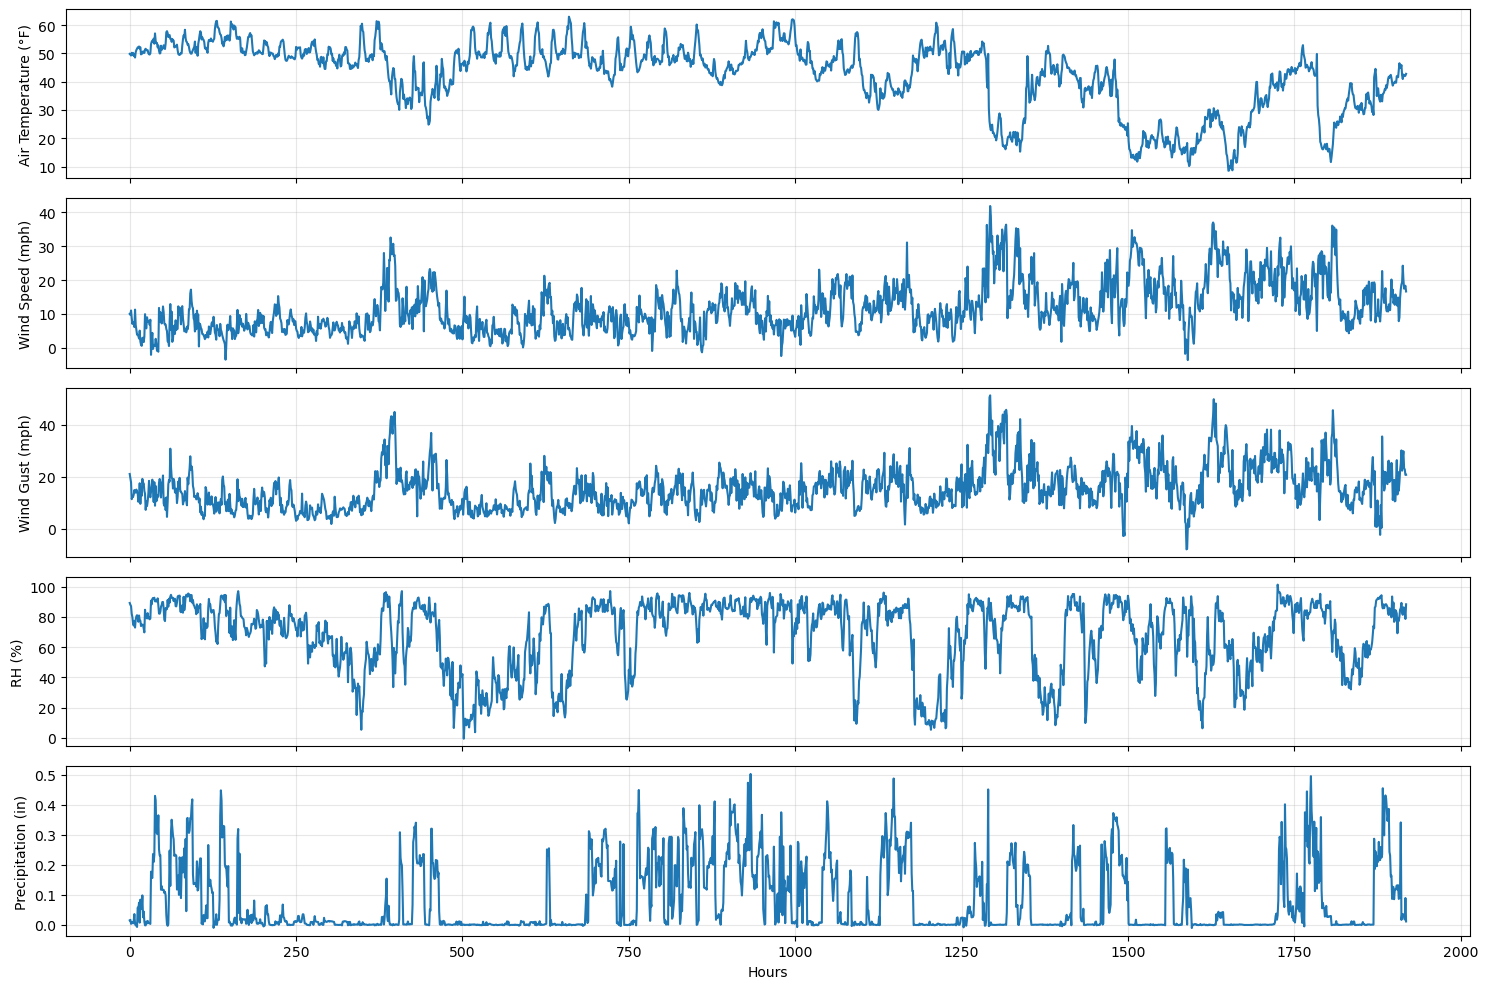

In [36]:
### I want this plot to have this formatting
### x5, vertically stacked subplots
### Only showing obs @ MITC from 2024
### Real data shown as #77aadd
### Predictions shown as #ee8866
"""
xdates = pd.to_datetime(df['observation_datetime'])
fig, ax = plt.subplots(1, 1, tight_layout=True)
ax.plot(xdates[::100], df[selected_var][::100], label=var_dropdown.label, color='orange')
ax.set_title(f"Time Series of {var_dropdown.label} at {station_dropdown.value}", fontsize=14)
ax.set_xlabel("Date")
ax.set_ylabel(var_dropdown.label)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.show()
"""

y_pred = selected_model.predict(X_true_test_filtered)

fig, axs = plt.subplots(5, 1, figsize=(15, 10), sharex=True)
labels = ['Air Temperature (°F)', 'Wind Speed (mph)', 'Wind Gust (mph)', 'RH (%)', 'Precipitation (in)']
for i, (ax, label) in enumerate(zip(axs, labels)):
    ax.plot(y_pred[:, i])
    ax.set_ylabel(label)
    ax.grid(True, alpha=0.3)
axs[-1].set_xlabel('Hours')
plt.tight_layout()
plt.show()

#### Your final decision

Given all your evaluation, it's time to make a final decision on whether you believe this model provides sufficient skill for the task at hand. Go back and review your problem statement. Does this model deliver the results needed?

<div class="alert alert-success" role="alert">
<p class="admonition-title" style="font-weight:bold">Exercise 3g</p>
    <p>In your <b>Machine Learning Model Handbook</b>, make a final decision on whether this model delivers on the results needed with supporting justification. Include the following:
    <ul>
        <li>Which environmental variables had the best evaluation metrics? List some physical scientific reasons why this may be the case.</li>
        <li>Is this model ready for use in the real world? Why or Why not?</li>
        <li>What other possible changes could further improve this model?</li>
    </ul>
    </p>
    <p>GENERAL RUBRIC TBD</p>
</div>